In [1]:
import numpy as np
import pandas as pd
import pgeocode
import folium
import requests
from sklearn.cluster import KMeans

# Loading Data

Custom csv files available on the github repository were hand-generated from the link in the data section of the report.

### Loading from DC

In [2]:
DC_neigh_df = pd.read_csv(r'DC.csv',names=['Neighborhood','Zip Code', 'idk'],index_col=False)
DC_neigh_df.drop(labels=['idk'],axis=1,inplace=True)
DC_neigh_df.head()

,Neighborhood,Zip Code
0,Adams Morgan,20009
1,American University Park,20016
2,Anacostia,20020
3,Arboretum,20002
4,Barnaby Woods,20015


### Loading from Seattle

In [3]:
WA_neigh_df = pd.read_csv(r'WA.csv',names=['Neighborhood','Zip Code', 'idk'],index_col=False)
WA_neigh_df.drop(labels=['idk'],axis=1,inplace=True)
WA_neigh_df.head()

,Neighborhood,Zip Code
0,Federal Way,98003
1,Bellevue,98005
2,Kirkland,98033
3,Lynnwood,98037
4,Mercer Island,98040


### Loading from Nashville

In [6]:
TN_neigh_df = pd.read_csv(r'TN.csv',names=['Neighborhood','Zip Code', 'idk'],index_col=False)
TN_neigh_df.drop(labels=['idk'],axis=1,inplace=True)
TN_neigh_df.head()

,Neighborhood,Zip Code
0,Downtown Nashville,37201
1,Edgehill / Music Row / The Gulch / West End Ci...,37203
2,12 South / Belmont / Lipscomb / Green Hills / ...,37204
3,Belle Meade / West End / West Meade,37205
4,East Nashville / Lockeland Springs,37206


# Handling Duplicate Zip Codes

Washington, DC

In [7]:
for idx1, code1 in enumerate(DC_neigh_df['Zip Code']):
    for idx2, code2 in enumerate(DC_neigh_df['Zip Code']):
        if (DC_neigh_df['Neighborhood'][idx1] != False):
            if (code1 == code2) & (idx1 != idx2):

                name = DC_neigh_df['Neighborhood'][idx1] + ' / ' + DC_neigh_df['Neighborhood'][idx2]
                code_n = code1
                new_row = {'Neighborhood':name,'Zip Code':code_n}
                DC_neigh_df=DC_neigh_df.append(new_row, ignore_index=True)
                DC_neigh_df['Neighborhood'][idx2] = False
                DC_neigh_df['Zip Code'][idx2] = False
                DC_neigh_df['Neighborhood'][idx1] = False
                DC_neigh_df['Zip Code'][idx1] = False
                
DC_neigh_df = DC_neigh_df[DC_neigh_df['Neighborhood'] != False]
DC_neigh_df.reset_index(drop=True, inplace=True)


DC_neigh_df

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,Neighborhood,Zip Code
0,Barney Circle,20003
1,Brookland,20017
2,Colonial Village,20012
3,Columbia Heights,20010
4,Downtown,20005
5,Dupont Circle,20036
6,Foggy Bottom,20037
7,Adams Morgan / Fairlawn,20009
8,Arboretum / Capitol Hill,20002
9,Barnaby Woods / Chevy Chase,20015


Seattle, Washington

In [8]:
for idx1, code1 in enumerate(WA_neigh_df['Zip Code']):
    for idx2, code2 in enumerate(WA_neigh_df['Zip Code']):
        if (WA_neigh_df['Neighborhood'][idx1] != False):
            if (code1 == code2) & (idx1 != idx2):

                name = WA_neigh_df['Neighborhood'][idx1] + ' / ' + WA_neigh_df['Neighborhood'][idx2]
                code_n = code1
                new_row = {'Neighborhood':name,'Zip Code':code_n}
                WA_neigh_df=WA_neigh_df.append(new_row, ignore_index=True)
                WA_neigh_df['Neighborhood'][idx2] = False
                WA_neigh_df['Zip Code'][idx2] = False
                WA_neigh_df['Neighborhood'][idx1] = False
                WA_neigh_df['Zip Code'][idx1] = False
                
WA_neigh_df = WA_neigh_df[WA_neigh_df['Neighborhood'] != False]
WA_neigh_df.reset_index(drop=True, inplace=True)


WA_neigh_df

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Neighborhood,Zip Code
0,Federal Way,98003
1,Bellevue,98005
2,Kirkland,98033
3,Lynnwood,98037
4,Mercer Island,98040
5,Redmond,98052
6,Renton,98055
7,Capital Hill,98102
8,Ballard,98107
9,Columbia City,98118


# Adding Latitude and Longitude for each city

Create nominatim object with code for USA

In [9]:
nomi = pgeocode.Nominatim('us')

#### Loop through neighborhoods in Nashville

In [10]:
TN_neigh_df['Latitude'] = np.nan
TN_neigh_df['Longitude'] = np.nan
for idx, code in enumerate(TN_neigh_df['Zip Code']):
    a = nomi.query_postal_code(str(TN_neigh_df['Zip Code'][idx]))
    TN_neigh_df['Latitude'][idx] = a.latitude # query object has attributes latitude and longitude
    TN_neigh_df['Longitude'][idx] = a.longitude 
TN_neigh_df

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,Zip Code,Latitude,Longitude
0,Downtown Nashville,37201,36.1657,-86.7781
1,Edgehill / Music Row / The Gulch / West End Ci...,37203,36.1504,-86.7916
2,12 South / Belmont / Lipscomb / Green Hills / ...,37204,36.1067,-86.7743
3,Belle Meade / West End / West Meade,37205,36.1114,-86.8690
4,East Nashville / Lockeland Springs,37206,36.1798,-86.7411
5,North Nashville / Dickerson Pike,37207,36.2195,-86.7740
6,Germantown,37208,36.1762,-86.8076
7,Charlotte Park / Sylvan Heights / Sylvan Park ...,37209,36.1546,-86.8602
8,Briley Parkway / South Nashville / Spence Lane...,37210,36.1379,-86.7410
9,Bradford Hills / Brentioch / Cane Ridge / Crie...,37211,36.0725,-86.7240


#### Looping through DC

In [11]:
DC_neigh_df['Latitude'] = np.nan
DC_neigh_df['Longitude'] = np.nan
for idx, code in enumerate(DC_neigh_df['Zip Code']):
    a = nomi.query_postal_code(str(DC_neigh_df['Zip Code'][idx]))
    DC_neigh_df['Latitude'][idx] = float(a.latitude) # query object has attributes latitude and longitude
    DC_neigh_df['Longitude'][idx] = a.longitude 
DC_neigh_df


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,Zip Code,Latitude,Longitude
0,Barney Circle,20003,38.8829,-76.9895
1,Brookland,20017,38.9367,-76.9940
2,Colonial Village,20012,38.9757,-77.0282
3,Columbia Heights,20010,38.9327,-77.0322
4,Downtown,20005,38.9067,-77.0312
5,Dupont Circle,20036,38.9087,-77.0414
6,Foggy Bottom,20037,38.9014,-77.0504
7,Adams Morgan / Fairlawn,20009,38.9202,-77.0375
8,Arboretum / Capitol Hill,20002,38.9024,-76.9901
9,Barnaby Woods / Chevy Chase,20015,38.9658,-77.0680


#### Looping through Seattle

In [13]:
WA_neigh_df['Latitude'] = np.nan
WA_neigh_df['Longitude'] = np.nan
for idx, code in enumerate(WA_neigh_df['Zip Code']):
    a = nomi.query_postal_code(str(WA_neigh_df['Zip Code'][idx]))
    WA_neigh_df['Latitude'][idx] = float(a.latitude) # query object has attributes latitude and longitude
    WA_neigh_df['Longitude'][idx] = a.longitude 
WA_neigh_df

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,Zip Code,Latitude,Longitude
0,Federal Way,98003,47.3203,-122.3117
1,Bellevue,98005,47.6150,-122.1663
2,Kirkland,98033,47.6786,-122.1894
3,Lynnwood,98037,47.8392,-122.2855
4,Mercer Island,98040,47.5603,-122.2281
5,Redmond,98052,47.6718,-122.1232
6,Renton,98055,47.4648,-122.2075
7,Capital Hill,98102,47.6302,-122.3210
8,Ballard,98107,47.6701,-122.3763
9,Columbia City,98118,47.5412,-122.2750


# Plotting Each City's Neighborhood 

## Nashville

In [14]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Nashville, TN'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
lat_TN = location.latitude
long_TN = location.longitude
print('The geograpical coordinate of Nashville are {}, {}.'.format(lat_TN, long_TN))

# create map of New York using latitude and longitude values
map_nashville = folium.Map(location=[lat_TN, long_TN], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(TN_neigh_df['Latitude'], TN_neigh_df['Longitude'], TN_neigh_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nashville)  
    
map_nashville

The geograpical coordinate of Nashville are 36.1622296, -86.7743531.


## Seattle

In [15]:
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
lat_WA = location.latitude
long_WA = location.longitude
print('The geograpical coordinate of Seattle are {}, {}.'.format(lat_WA, long_WA))

# create map of New York using latitude and longitude values
map_seattle = folium.Map(location=[lat_WA, long_WA], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(WA_neigh_df['Latitude'], WA_neigh_df['Longitude'], WA_neigh_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

The geograpical coordinate of Seattle are 47.6038321, -122.3300624.


## Washington, DC

In [16]:
address = 'Washington, DC'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
lat_DC = location.latitude
long_DC = location.longitude
print('The geograpical coordinate of Washington, DC are {}, {}.'.format(lat_DC, long_DC))

# create map of New York using latitude and longitude values
map_DC = folium.Map(location=[lat_DC, long_DC], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(DC_neigh_df['Latitude'], DC_neigh_df['Longitude'], DC_neigh_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_DC)  
    
map_DC

The geograpical coordinate of Washington, DC are 38.8949924, -77.0365581.


# Get Foursquare Data about Venues

#### Define Foursquare Credentials

In [17]:
CLIENT_ID = 'YQIDONKYXMITAXFHDLUO1EDTJ3QNZESPER4BM1GTW5MEQEV2' # your Foursquare ID
CLIENT_SECRET = 'FAOHEWPKCB3P3CH3CXKXINLRSES502WU4QRCZNA5MMD1CZOC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YQIDONKYXMITAXFHDLUO1EDTJ3QNZESPER4BM1GTW5MEQEV2
CLIENT_SECRET:FAOHEWPKCB3P3CH3CXKXINLRSES502WU4QRCZNA5MMD1CZOC


#### Function for getting Foursquare Data

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=550):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
nashville_venues = getNearbyVenues(names=TN_neigh_df['Neighborhood'],
                                   latitudes=TN_neigh_df['Latitude'],
                                   longitudes=TN_neigh_df['Longitude']
                                  )
seattle_venues = getNearbyVenues(names=WA_neigh_df['Neighborhood'],
                                   latitudes=WA_neigh_df['Latitude'],
                                   longitudes=WA_neigh_df['Longitude']
                                  )
DC_venues = getNearbyVenues(names=DC_neigh_df['Neighborhood'],
                               latitudes=DC_neigh_df['Latitude'],
                               longitudes=DC_neigh_df['Longitude']
                                  )

In [20]:
nashville_venues.shape

(326, 7)

### Convert venues to One Hot Encoding

In [21]:
nashville_onehot = pd.get_dummies(nashville_venues[['Venue Category']], prefix="", prefix_sep="")
nashville_onehot['Neighborhood'] = nashville_venues['Neighborhood'] 
fixed_columns = [nashville_onehot.columns[-1]] + list(nashville_onehot.columns[:-1])
nashville_onehot = nashville_onehot[fixed_columns]

DC_onehot = pd.get_dummies(DC_venues[['Venue Category']], prefix="", prefix_sep="")
DC_onehot['Neighborhood'] = DC_venues['Neighborhood'] 
fixed_columns = [DC_onehot.columns[-1]] + list(DC_onehot.columns[:-1])
DC_onehot = DC_onehot[fixed_columns]

seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")
seattle_onehot['Neighborhood'] = seattle_venues['Neighborhood'] 
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

## Nashville

In [101]:
nashville_grouped = nashville_onehot.groupby('Neighborhood').mean().reset_index()
nashville_grouped

,Neighborhood,Accessories Store,Adult Boutique,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,...,Taco Place,Thai Restaurant,Theme Restaurant,Thrift / Vintage Store,Tour Provider,Transportation Service,Vegetarian / Vegan Restaurant,Video Store,Women's Store,Yoga Studio
0,12 South / Belmont / Lipscomb / Green Hills / Oak Hill / Edgehill,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Airport / Donelson,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.153846,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923
2,Belle Meade / Forest Hills / Green Hills,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.083333,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000
3,Bellevue,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Belmont / Hillsboro Village / Music Row / Vanderbilt,0.0,0.016393,0.049180,0.00,0.000000,0.016393,0.000000,0.000000,0.000000,...,0.016393,0.000000,0.00,0.016393,0.000000,0.000000,0.000000,0.032787,0.000000,0.000000
5,Bradford Hills / Brentioch / Cane Ridge / Crieve Hall,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.166667,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Briley Parkway / Edge-o-Lake / Priest Lake,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Briley Parkway / South Nashville / Spence Lane / Sterling Heights / Woodbine,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Central Business District / Downtown,0.0,0.000000,0.017857,0.00,0.017857,0.000000,0.000000,0.000000,0.017857,...,0.000000,0.000000,0.00,0.000000,0.017857,0.017857,0.000000,0.000000,0.000000,0.000000
9,Charlotte Park / Sylvan Heights / Sylvan Park / The Nations,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000


In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nashville_grouped['Neighborhood']
for ind in np.arange(nashville_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nashville_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,12 South / Belmont / Lipscomb / Green Hills / ...,Snack Place,Garden,Farm,Yoga Studio,Courthouse
1,Airport / Donelson,Pizza Place,Automotive Shop,Yoga Studio,Sporting Goods Shop,Convenience Store
2,Belle Meade / Forest Hills / Green Hills,Sandwich Place,Gym,Automotive Shop,Fast Food Restaurant,Mobile Phone Shop
3,Bellevue,BBQ Joint,Hotel,Yoga Studio,Farmers Market,Farm
4,Belmont / Hillsboro Village / Music Row / Vand...,Boutique,Coffee Shop,American Restaurant,Sandwich Place,Dive Bar


In [39]:
# set number of clusters
kclusters = 10

nashville_grouped_clustering = nashville_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nashville_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
if 'Cluster Labels' in neighborhoods_venues_sorted:
    neighborhoods_venues_sorted.drop('Cluster Labels', inplace=True,axis=1)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nashville_merged = TN_neigh_df

# merge nashville_grouped with map_df to add latitude/longitude for each neighborhood
nashville_merged = nashville_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
nashville_merged.dropna(inplace=True)
nashville_merged.reset_index(inplace=True,drop=True)
nashville_merged

,Neighborhood,Zip Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Downtown Nashville,37201,36.1657,-86.7781,3.0,Bar,Music Venue,Hotel,American Restaurant,Steakhouse
1,Edgehill / Music Row / The Gulch / West End Circle / Wedgewood,37203,36.1504,-86.7916,3.0,Bar,Spa,New American Restaurant,Pizza Place,Hotel
2,12 South / Belmont / Lipscomb / Green Hills / Oak Hill / Edgehill,37204,36.1067,-86.7743,5.0,Snack Place,Garden,Farm,Yoga Studio,Courthouse
3,East Nashville / Lockeland Springs,37206,36.1798,-86.7411,3.0,Health & Beauty Service,Bakery,Pizza Place,Rock Climbing Spot,Japanese Restaurant
4,North Nashville / Dickerson Pike,37207,36.2195,-86.7740,7.0,Accessories Store,Discount Store,Home Service,Music Store,Cosmetics Shop
5,Germantown,37208,36.1762,-86.8076,6.0,Convenience Store,Vegetarian / Vegan Restaurant,Discount Store,Fast Food Restaurant,Courthouse
6,Charlotte Park / Sylvan Heights / Sylvan Park / The Nations,37209,36.1546,-86.8602,3.0,Pharmacy,Breakfast Spot,Hotel,Discount Store,Construction & Landscaping
7,Briley Parkway / South Nashville / Spence Lane / Sterling Heights / Woodbine,37210,36.1379,-86.7410,8.0,BBQ Joint,Coffee Shop,Bakery,Diner,Fast Food Restaurant
8,Bradford Hills / Brentioch / Cane Ridge / Crieve Hall,37211,36.0725,-86.7240,9.0,Pharmacy,Auto Workshop,Korean Restaurant,Pizza Place,Restaurant
9,Belmont / Hillsboro Village / Music Row / Vanderbilt,37212,36.1337,-86.8006,3.0,Boutique,Coffee Shop,American Restaurant,Sandwich Place,Dive Bar


### Two neighborhoods in the list (Belle Meade/West End/West Meade and Bordeaux) had no venues listed, so they were removed from the dataset

In [40]:
print(nashville_venues[nashville_venues['Neighborhood'] == 'Belle Meade / West End / West Meade'])
print(nashville_venues[nashville_venues['Neighborhood'] == 'Bordeaux'])

Empty DataFrame
Columns: [Neighborhood, Neighborhood Latitude, Neighborhood Longitude, Venue, Venue Latitude, Venue Longitude, Venue Category]
Index: []
Empty DataFrame
Columns: [Neighborhood, Neighborhood Latitude, Neighborhood Longitude, Venue, Venue Latitude, Venue Longitude, Venue Category]
Index: []


In [41]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[lat_TN, long_TN], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nashville_merged['Latitude'], nashville_merged['Longitude'], nashville_merged['Neighborhood'], nashville_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## DC

In [42]:
DC_grouped = DC_onehot.groupby('Neighborhood').mean().reset_index()
num_top_venues = 5
indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = DC_grouped['Neighborhood']
for ind in np.arange(DC_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(DC_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()
# set number of clusters
kclusters = 10

DC_grouped_clustering = DC_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(DC_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
if 'Cluster Labels' in neighborhoods_venues_sorted:
    neighborhoods_venues_sorted.drop('Cluster Labels', inplace=True,axis=1)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

DC_merged = DC_neigh_df

# merge DC_grouped with map_df to add latitude/longitude for each neighborhood
DC_merged = DC_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
DC_merged.dropna(inplace=True)
DC_merged.reset_index(inplace=True,drop=True)
DC_merged

,Neighborhood,Zip Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barney Circle,20003,38.8829,-76.9895,0,Pizza Place,Sandwich Place,Coffee Shop,Liquor Store,Bakery
1,Brookland,20017,38.9367,-76.9940,0,Spa,Sandwich Place,Bar,Art Gallery,Coffee Shop
2,Colonial Village,20012,38.9757,-77.0282,8,Liquor Store,Fast Food Restaurant,Convenience Store,Antique Shop,Donut Shop
3,Columbia Heights,20010,38.9327,-77.0322,0,Bar,Pizza Place,Mexican Restaurant,Bakery,Cuban Restaurant
4,Downtown,20005,38.9067,-77.0312,9,Hotel,Coffee Shop,Hotel Bar,American Restaurant,Salon / Barbershop
5,Dupont Circle,20036,38.9087,-77.0414,9,Sandwich Place,Hotel,Mediterranean Restaurant,Italian Restaurant,Pizza Place
6,Foggy Bottom,20037,38.9014,-77.0504,9,Hotel,American Restaurant,Café,Hotel Bar,Grocery Store
7,Adams Morgan / Fairlawn,20009,38.9202,-77.0375,0,Bar,Latin American Restaurant,Taco Place,Spa,Gym / Fitness Center
8,Arboretum / Capitol Hill,20002,38.9024,-76.9901,0,Pizza Place,Bar,Art Gallery,Wine Bar,Fried Chicken Joint
9,Barnaby Woods / Chevy Chase,20015,38.9658,-77.0680,1,Recreation Center,Grocery Store,Xinjiang Restaurant,Deli / Bodega,Ethiopian Restaurant


In [43]:
# create map
map_clusters = folium.Map(location=[lat_DC, long_DC], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(DC_merged['Latitude'], DC_merged['Longitude'], DC_merged['Neighborhood'], DC_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Seattle

In [44]:
seattle_grouped = seattle_onehot.groupby('Neighborhood').mean().reset_index()
num_top_venues = 5
indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = seattle_grouped['Neighborhood']
for ind in np.arange(seattle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()
# set number of clusters
kclusters = 10

seattle_grouped_clustering = seattle_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
if 'Cluster Labels' in neighborhoods_venues_sorted:
    neighborhoods_venues_sorted.drop('Cluster Labels', inplace=True,axis=1)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

seattle_merged = WA_neigh_df

# merge seattle_grouped with map_df to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
seattle_merged.dropna(inplace=True)
seattle_merged.reset_index(inplace=True,drop=True)
seattle_merged

,Neighborhood,Zip Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Federal Way,98003,47.3203,-122.3117,0.0,Korean Restaurant,Pet Store,Mexican Restaurant,Discount Store,American Restaurant
1,Bellevue,98005,47.6150,-122.1663,2.0,Bus Stop,Other Repair Shop,Zoo Exhibit,Ethiopian Restaurant,Food Truck
2,Kirkland,98033,47.6786,-122.1894,5.0,Trail,Doctor's Office,Outdoor Sculpture,Gym,Nightclub
3,Mercer Island,98040,47.5603,-122.2281,4.0,Home Service,Locksmith,Lawyer,Thrift / Vintage Store,Zoo Exhibit
4,Redmond,98052,47.6718,-122.1232,0.0,Bakery,Coffee Shop,Pizza Place,Sandwich Place,Juice Bar
5,Renton,98055,47.4648,-122.2075,3.0,Coffee Shop,Insurance Office,Asian Restaurant,Bar,Ethiopian Restaurant
6,Capital Hill,98102,47.6302,-122.3210,0.0,Garden,Scenic Lookout,Trail,Food Truck,Bed & Breakfast
7,Ballard,98107,47.6701,-122.3763,0.0,Coffee Shop,Brewery,Vietnamese Restaurant,Food Truck,Pet Store
8,Columbia City,98118,47.5412,-122.2750,0.0,Mexican Restaurant,Light Rail Station,Greek Restaurant,Food Truck,Fast Food Restaurant
9,Belltown,98121,47.6151,-122.3447,0.0,Coffee Shop,Sushi Restaurant,Italian Restaurant,Breakfast Spot,Hotel


In [47]:
# create map
map_clusters = folium.Map(location=[lat_WA, long_WA], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seattle_merged['Latitude'], seattle_merged['Longitude'], seattle_merged['Neighborhood'], seattle_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Clustering all the Neighborhoods Together

#### Combining all the neighborhood venues together

In [60]:
TN_neigh_df['City'] = 'Nashville'
WA_neigh_df['City'] = 'Seattle'
DC_neigh_df['City'] = 'DC'
composite_df = TN_neigh_df.append(WA_neigh_df).append(DC_neigh_df)
composite_df

,Neighborhood,Zip Code,Latitude,Longitude,City
0,Downtown Nashville,37201,36.1657,-86.7781,Nashville
1,Edgehill / Music Row / The Gulch / West End Circle / Wedgewood,37203,36.1504,-86.7916,Nashville
2,12 South / Belmont / Lipscomb / Green Hills / Oak Hill / Edgehill,37204,36.1067,-86.7743,Nashville
3,Belle Meade / West End / West Meade,37205,36.1114,-86.8690,Nashville
4,East Nashville / Lockeland Springs,37206,36.1798,-86.7411,Nashville
...,...,...,...,...,...
29,Hillcrest / Anacostia / Barry Farm,20020,38.8600,-76.9742,DC
30,Howard University / Judiciary Square,20001,38.9122,-77.0177,DC
31,Kalorama / Cleveland Park / Forest Hills,20008,38.9363,-77.0599,DC
32,Kenilworth / Benning / Benning Heights,20019,38.8902,-76.9376,DC


#### Query venues for the composite list

In [58]:
composite_venues = getNearbyVenues(names=composite_df['Neighborhood'],
                                   latitudes=composite_df['Latitude'],
                                   longitudes=composite_df['Longitude']
                                  )

#### Convert to onehot

In [63]:
composite_onehot = pd.get_dummies(composite_venues[['Venue Category']], prefix="", prefix_sep="")
composite_onehot['Neighborhood'] = composite_venues['Neighborhood'] 
fixed_columns = [composite_onehot.columns[-1]] + list(composite_onehot.columns[:-1])
composite_onehot = composite_onehot[fixed_columns]

In [74]:
composite_grouped = composite_onehot.groupby('Neighborhood').mean().reset_index()
num_top_venues = 5
indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = composite_grouped['Neighborhood']
for ind in np.arange(composite_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(composite_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()


,Neighborhood,Zip Code,Latitude,Longitude,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Downtown Nashville,37201,36.1657,-86.7781,Nashville,12.0,Bar,Music Venue,Hotel,American Restaurant,Coffee Shop
1,Edgehill / Music Row / The Gulch / West End Circle / Wedgewood,37203,36.1504,-86.7916,Nashville,12.0,Bar,Pizza Place,Hotel,New American Restaurant,Spa
2,12 South / Belmont / Lipscomb / Green Hills / Oak Hill / Edgehill,37204,36.1067,-86.7743,Nashville,14.0,Farm,Garden,Snack Place,Falafel Restaurant,English Restaurant
3,East Nashville / Lockeland Springs,37206,36.1798,-86.7411,Nashville,9.0,Bar,Health & Beauty Service,Bakery,Outdoor Supply Store,Rock Climbing Spot
4,North Nashville / Dickerson Pike,37207,36.2195,-86.7740,Nashville,18.0,Discount Store,Accessories Store,Cosmetics Shop,Home Service,Music Store
...,...,...,...,...,...,...,...,...,...,...,...
66,Hillcrest / Anacostia / Barry Farm,20020,38.8600,-76.9742,DC,7.0,Fried Chicken Joint,Recreation Center,Park,Museum,Check Cashing Service
67,Howard University / Judiciary Square,20001,38.9122,-77.0177,DC,12.0,Liquor Store,Thai Restaurant,Cocktail Bar,Bus Stop,Café
68,Kalorama / Cleveland Park / Forest Hills,20008,38.9363,-77.0599,DC,9.0,Mexican Restaurant,Thai Restaurant,Italian Restaurant,Mediterranean Restaurant,Department Store
69,Kenilworth / Benning / Benning Heights,20019,38.8902,-76.9376,DC,6.0,Convenience Store,Sandwich Place,Seafood Restaurant,Metro Station,Donut Shop


### Finding Optimal Cluster Performance

Text(0.5, 0, 'Number of Clusters')

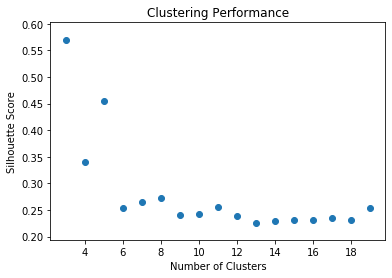

In [91]:
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
composite_grouped_clustering = composite_grouped.drop('Neighborhood', 1)
scores = [0]*20
for kclusters in range(3,20):
    
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(composite_grouped_clustering)
    labels = kmeans.labels_
    scores[kclusters] = silhouette_score(composite_grouped_clustering, labels, metric='euclidean')
plt.scatter(range(3,20),scores[3:20])
plt.title('Clustering Performance')
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')

After a few runs of the above cell, I've become convinced that the elbow of this curve is somewhere around 10, so I'll be using 10 clusters.

In [106]:
# Setting number of clusters
kclusters = 20

composite_grouped_clustering = composite_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(composite_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
if 'Cluster Labels' in neighborhoods_venues_sorted:
    neighborhoods_venues_sorted.drop('Cluster Labels', inplace=True,axis=1)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

composite_merged = composite_df

# merge composite_grouped with map_df to add latitude/longitude for each neighborhood
composite_merged = composite_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
composite_merged.dropna(inplace=True)
composite_merged.reset_index(inplace=True,drop=True)
composite_merged

,Neighborhood,Zip Code,Latitude,Longitude,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Downtown Nashville,37201,36.1657,-86.7781,Nashville,12.0,Bar,Music Venue,Hotel,American Restaurant,Coffee Shop
1,Edgehill / Music Row / The Gulch / West End Circle / Wedgewood,37203,36.1504,-86.7916,Nashville,12.0,Bar,Pizza Place,Hotel,New American Restaurant,Spa
2,12 South / Belmont / Lipscomb / Green Hills / Oak Hill / Edgehill,37204,36.1067,-86.7743,Nashville,14.0,Farm,Garden,Snack Place,Falafel Restaurant,English Restaurant
3,East Nashville / Lockeland Springs,37206,36.1798,-86.7411,Nashville,9.0,Bar,Health & Beauty Service,Bakery,Outdoor Supply Store,Rock Climbing Spot
4,North Nashville / Dickerson Pike,37207,36.2195,-86.7740,Nashville,18.0,Discount Store,Accessories Store,Cosmetics Shop,Home Service,Music Store
...,...,...,...,...,...,...,...,...,...,...,...
66,Hillcrest / Anacostia / Barry Farm,20020,38.8600,-76.9742,DC,7.0,Fried Chicken Joint,Recreation Center,Park,Museum,Check Cashing Service
67,Howard University / Judiciary Square,20001,38.9122,-77.0177,DC,12.0,Liquor Store,Thai Restaurant,Cocktail Bar,Bus Stop,Café
68,Kalorama / Cleveland Park / Forest Hills,20008,38.9363,-77.0599,DC,9.0,Mexican Restaurant,Thai Restaurant,Italian Restaurant,Mediterranean Restaurant,Department Store
69,Kenilworth / Benning / Benning Heights,20019,38.8902,-76.9376,DC,6.0,Convenience Store,Sandwich Place,Seafood Restaurant,Metro Station,Donut Shop


In [128]:
# Pick location for map generation:
# 1 ........... Nashville
# 2 ........... Seattle
# 3 ........... DC
loc = 2

In [129]:
# create map
if loc == 1:
    map_clusters = folium.Map(location=[lat_TN, long_TN], zoom_start=11)
if loc == 2:
    map_clusters = folium.Map(location=[lat_WA, long_WA], zoom_start=11)
if loc == 3:
    map_clusters = folium.Map(location=[lat_DC, long_DC], zoom_start=11)
    

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(composite_merged['Latitude'], composite_merged['Longitude'],composite_merged['Neighborhood'], composite_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [113]:
composite_merged.groupby('Cluster Labels').count()

,Neighborhood,Zip Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
City,,,,,,,,,,
DC,34,34,34,34,34,34,34,34,34,34
Nashville,17,17,17,17,17,17,17,17,17,17
Seattle,20,20,20,20,20,20,20,20,20,20


In [121]:
results_table = composite_merged.groupby(['Cluster Labels','City']).count()

In [125]:
results_table

Neighborhood  Zip Code  Latitude  Longitude  \
Cluster Labels City                                                     
0.0            DC         1             1         1         1           
1.0            DC         1             1         1         1           
               Seattle    1             1         1         1           
2.0            Seattle    1             1         1         1           
3.0            Nashville  1             1         1         1           
4.0            DC         2             2         2         2           
5.0            Nashville  1             1         1         1           
6.0            DC         6             6         6         6           
7.0            DC         4             4         4         4           
8.0            Nashville  1             1         1         1           
9.0            DC         8             8         8         8           
               Nashville  8             8         8         8           
               Seattle    12            12        12        12          
10.0           Nashville  1             1         1         1           
11.0           DC         2             2         2         2           
12.0           DC         7             7         7         7           
               Nashville  2             2         2         2           
               Seattle    2             2         2         2           
13.0           DC         3             3         3         3           
14.0           Nashville  1             1         1         1           
15.0           Seattle    1             1         1         1           
16.0           Seattle    1             1         1         1           
17.0           Nashville  1             1         1         1           
               Seattle    1             1         1         1           
18.0           Nashville  1             1         1         1           
19.0           Seattle    1             1         1         1           

                          1st Most Common Venue  2nd Most Common Venue  \
Cluster Labels City                                                      
0.0            DC         1                      1                       
1.0            DC         1                      1                       
               Seattle    1                      1                       
2.0            Seattle    1                      1                       
3.0            Nashville  1                      1                       
4.0            DC         2                      2                       
5.0            Nashville  1                      1                       
6.0            DC         6                      6                       
7.0            DC         4                      4                       
8.0            Nashville  1                      1                       
9.0            DC         8                      8                       
               Nashville  8                      8                       
               Seattle    12                     12                      
10.0           Nashville  1                      1                       
11.0           DC         2                      2                       
12.0           DC         7                      7                       
               Nashville  2                      2                       
               Seattle    2                      2                       
13.0           DC         3                      3                       
14.0           Nashville  1                      1                       
15.0           Seattle    1                      1                       
16.0           Seattle    1                      1                       
17.0           Nashville  1                      1                       
               Seattle    1                      1                       
18.0           Nashville  1                      1       